In [1]:
# DIRECTORY SET
import os
import sys
import traceback
from pathlib import Path
base_dir=Path(os.getcwd()).parent.parent
os.chdir(base_dir)
print(os.getcwd())

# ENVIRONMENT VARIABLES
import dotenv
dotenv.load_dotenv()

# DJANGO SETUP
import django
sys.path.append(os.path.abspath(''))
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "serverproject.settings")
django.setup()

# Import async modules
import asyncio
from asgiref.sync import sync_to_async

# Import display modules
from IPython.display import display, Markdown

# Import other modules
import faiss

# import reloading
from importlib import reload

# Enable autoreload
%load_ext autoreload
%autoreload 2

# Import custom modules
from destinyapp.models import StreamRecapData

from destinyapp.customlibrary import services
from destinyapp.customlibrary import utils
from destinyapp.customlibrary import controller

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from collections import defaultdict
import textwrap
import numpy as np
from IPython.display import display

d:\DestinyFolder\DestinyRecaps\DestinyRecapsApi\serverproject


In [ ]:
annotated_results[0]

In [2]:
# Input parameter
video_id="OqVH_MTBQ6k"

# load data from testing_visualization_annotation_results.json
import json
with open(f"testing_visualization_data_gen.json", "r") as f:
    data_gen=json.load(f)

annotated_results=data_gen["annotated_results"]
major_topics=data_gen["major_topics"]
minor_topics=data_gen["minor_topics"]

stream_recap_data=await utils.get_recap_data(video_id)

plot_segments_old, category_locations_old, color_dict_old = await services.RV.create_segments(stream_recap_data.linked_transcript, annotated_results, major_topics, stream_recap_data.transcript)

In [34]:
plot_object, annotated_segments, plot_segments, category_locations = await services.StreamPlotController.process_data(stream_recap_data, annotated_results, major_topics, minor_topics, video_id)

In [23]:
plot_segments

[{'category': 'non categorized',
  'color': 'black',
  'start_time': 152,
  'end_time': 427,
  'width': 275,
  'texts': ["Destiny: Wow. I feel like it's a huge mistake for buying out res. Well, we'll get to there. Hold on, hold on. Four DM's. I'm waking up earlier every day. I how much? I've been experimenting with the starch stuff. I don't think I like it. I don't think I like it. How much do you have to use to not like? Was it actually worth? Where are my ironers at? Was the next four years under Trump going to be for you? Well, considering I'll probably save more on my taxes than you'll make in a year, probably pretty good. If he wins, I I'm in what they call a win win situation, my friend. What'the? Blur. I should have bottom the camera, my water bottle, iron, my uniform for work for yos. And I can never tell the difference between using starch firstr not using it. Maybe I'm retarded. Um, yeah, I dont t know. Maybe on different fabrics it matters more. Hold on. Four more DM's. Star

In [35]:
plot_object.segments[2]

Segment(category='non categorized', color='black', start_time=569, end_time=633, width=0.00378698224852071, x=0.026568047337278106, texts=["recommend it, blah, bl blah. You ask them, who is your doctor? And if they say, oh, it's my general practitioner, whatever. O okay, sure. Your GP or whoever you see normally. But if they say, well, I went to a clinic that specializes in this, they will always try to sell you trt every single time. There'not a single man that will walk into a maye clinic that will not come out with, like, 16 different recommendations for things. Fashion bar here. You're going to come to the realization literally every piece of your wardrobe worth of shit will need ironing every time after use. It's going to make you frustrated. It's going to annoy you, but it's a fact of life, unfortunately. I don't mind ironing. Like I said, the cotton t shirts I have for sure, but I disagree. I feel like there are some synthetic fibrics that some synthetic fabrics that you just do

In [36]:
plot_object.abstractions

{'non categorized': Abstraction(width=0.34372781065088764, color='black', x=None, y=None, size=None),
 'minor topics': Abstraction(width=0.14355029585798815, color='yellow', x=0.12788803186469155, y=0.3, size=0.15577606372938307),
 "Biden's Decision Not to Seek Re-election": Abstraction(width=0.04964497041420119, color='green', x=0.635725541120726, y=0.3, size=0.12456230263987766),
 'Kamala Harris as Potential Democratic Nominee': Abstraction(width=0.11159763313609468, color='blue', x=0.2591822956533961, y=0.45, size=0.14681246384802604),
 "Trump's Actions and Republican Party": Abstraction(width=0.1415976331360947, color='red', x=0.3902179885270553, y=0.3, size=0.15525892189929236),
 'Immigration and Asylum Policy': Abstraction(width=0.10757396449704143, color='purple', x=0.5206459196387443, y=0.45, size=0.14559694032408568),
 'Analysis of Federalist Paper No. 78': Abstraction(width=0.14426035502958579, color='orange', x=0.7559883136579832, y=0.45, size=0.155963242434637)}

In [24]:
plot_object.time_normalization

TimeNormalization(start_offset=152, net_duration=16900)

In [5]:
plot_object.plot_parameters

PlotParameters(background_color=96, plotting_width=10, plotting_height=10, bar_height_setting=0.15, upper_y=0.45, lower_y=0.3, circle_size_multiplier=0.1, circle_size_offset=0.08, abstraction_width_cutoff=0.05, central_y=0.7, video_id='OqVH_MTBQ6k')

In [10]:
plot_segments[3]

{'category': 'minor topics',
 'color': 'yellow',
 'start_time': 633,
 'end_time': 754,
 'width': 121,
 'texts': ["shirt and, like, nothing is even happening. They don't hold creases, but they don't wrinkle out of the dryer. It's just I think certain types of fabrics probably lend themselves more like cotton stuff. Like I said, I have a few t shirts that are cotton. Those iron very well, and they wrinkle horribly. Yeah. But I think it more depends on the fabric more than anything else. A quick shout out, apparently. Apparently Trainreeckx said that he got in contact with kicks moderation. They chatted with them, they chatted with me. We had a chat back and forth and. Yeah, damn, squad w. Do you use fabric soft often when you do laundry? I don't even know what that is. I don't think so. Or maybe I do. I do laundry detergent, and then I use a dryer sheet in the dryer for static, I think. But I also heard that called fabric softener, to be honest. You can afford one of those dumb, expensiv

In [6]:
plot_object.abstractions

{'non categorized': Abstraction(width=5809, color='black', x=None, y=None, size=None),
 'minor topics': Abstraction(width=2426, color='yellow', x=5.015444142409901, y=0.3, size=9.930888284819803),
 "Biden's Decision Not to Seek Re-election": Abstraction(width=839, color='green', x=-1.5225528813370168, y=0.3, size=5.873099343184096),
 'Kamala Harris as Potential Democratic Nominee': Abstraction(width=1886, color='blue', x=3.9444801281836455, y=0.45, size=8.765620300243386),
 "Trump's Actions and Republican Party": Abstraction(width=2393, color='red', x=2.8399018950014927, y=0.3, size=9.863659846908009),
 'Immigration and Asylum Policy': Abstraction(width=1818, color='purple', x=1.656314632763216, y=0.45, size=8.607602242131136),
 'Analysis of Federalist Paper No. 78': Abstraction(width=2438, color='orange', x=-4.027610758251413, y=0.45, size=9.955221516502808)}

non categorized 0.34372781065088764
minor topics 0.14355029585798815
Biden's Decision Not to Seek Re-election 0.04964497041420119
Kamala Harris as Potential Democratic Nominee 0.11159763313609468
Trump's Actions and Republican Party 0.1415976331360947
Immigration and Asylum Policy 0.10757396449704143
Analysis of Federalist Paper No. 78 0.14426035502958579


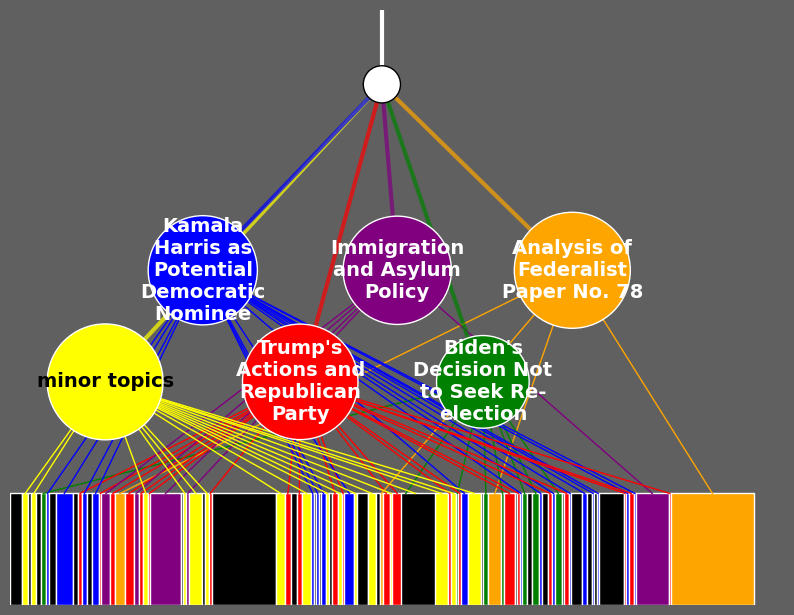

In [39]:
test=await services.StreamPlotController.generate_plot(plot_object)

In [33]:
plot_object.segments

[Segment(category='non categorized', color='black', start_time=152, end_time=427, width=275, x=0.008136094674556213, texts=["Destiny: Wow. I feel like it's a huge mistake for buying out res. Well, we'll get to there. Hold on, hold on. Four DM's. I'm waking up earlier every day. I how much? I've been experimenting with the starch stuff. I don't think I like it. I don't think I like it. How much do you have to use to not like? Was it actually worth? Where are my ironers at? Was the next four years under Trump going to be for you? Well, considering I'll probably save more on my taxes than you'll make in a year, probably pretty good. If he wins, I I'm in what they call a win win situation, my friend. What'the? Blur. I should have bottom the camera, my water bottle, iron, my uniform for work for yos. And I can never tell the difference between using starch firstr not using it. Maybe I'm retarded. Um, yeah, I dont t know. Maybe on different fabrics it matters more. Hold on. Four more DM's. S

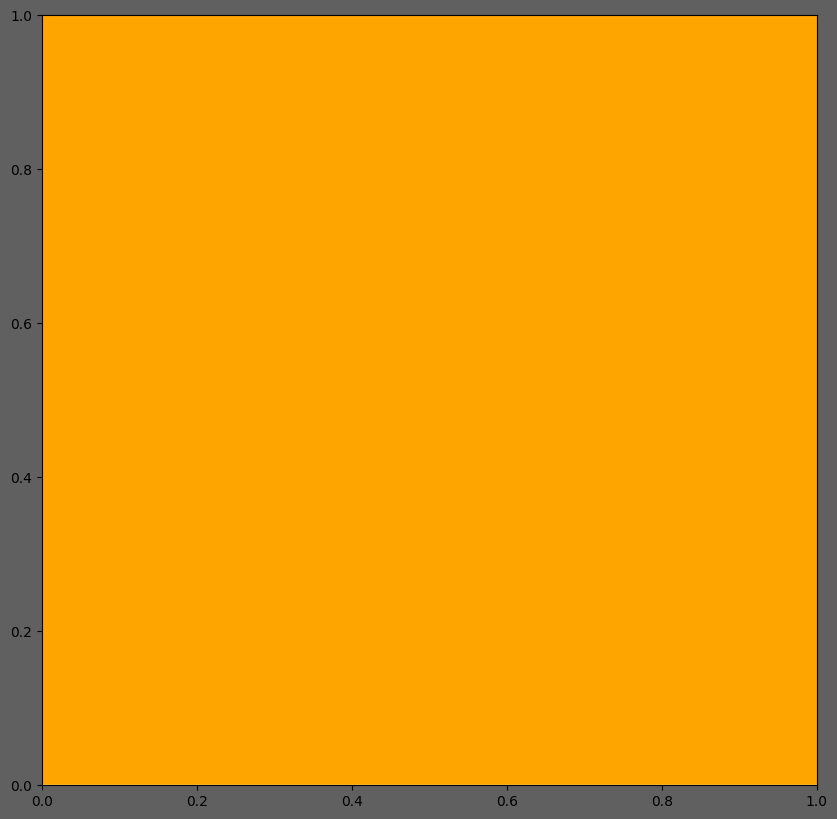

In [32]:
# Create the plot with a specific gray background
fig, ax = plt.subplots(figsize=(plot_object.plot_parameters.plotting_width, plot_object.plot_parameters.plotting_height))
hex_background_color = '#%02x%02x%02x' % (int(plot_object.plot_parameters.background_color), int(plot_object.plot_parameters.background_color), int(plot_object.plot_parameters.background_color))
fig.patch.set_facecolor(hex_background_color)  # Set figure background to [96, 96, 96]
ax.set_facecolor(hex_background_color)  # Set axes background to [96, 96, 96]
target_plot_width=10
plt.close(fig)

# Plot BAR 
current_x = 0
category_info = defaultdict(lambda: {"total_width": 0, "segments": []})

bar_height = plot_object.plot_parameters.bar_height_setting*plot_object.plot_parameters.plotting_height

clickable_area_x_offset=0.085
clickable_area_y_offset=0.1
clickable_y_height_multiplier=1.22
clickable_areas=[]
# href_base="https://youtu.be/"+video_id+"?t="

for i, segment in enumerate(plot_object.segments):
    ax.add_patch(plt.Rectangle((((segment.x-(segment.width/2))*plot_object.plot_parameters.plotting_width), 0), segment.width*plot_object.plot_parameters.plotting_width, bar_height, 
                            facecolor=segment.color, edgecolor='white'))
    

from IPython.display import display

# Display the plot
display(fig)

In [ ]:
annotated_segments[0]

In [ ]:
category_locations

In [ ]:
plot_segments[0]

In [ ]:
print(plot_segments==plot_segments_old)
print(category_locations==category_locations_old)
print(color_dict==color_dict_old)

In [ ]:
category_locations

In [ ]:
category_locations_old

In [ ]:
plot_segments_old[0]

In [ ]:
plot_segments[0]